In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # visualization
!pip install seaborn as sns -q --upgrade pip # visualization with seaborn v0.11.1
import seaborn as sns # visualization
import missingno as msno # missing values pattern visualization
#set seed
import random
seed = 41
!pip install dabl -q --upgrade pip
import dabl # quick exploration and model assessment



import warnings # supress warnings
warnings.filterwarnings('ignore')

# set pandas display option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the data 
train_df = pd.read_csv('../input/widsdatathon2021/TrainingWiDS2021.csv')
test_df = pd.read_csv('../input/widsdatathon2021/UnlabeledWiDS2021.csv')
data_dictionary_df = pd.read_csv("../input/widsdatathon2021/DataDictionaryWiDS2021.csv")

# Drop first column because it is identical to index
train_df.drop(columns = ['Unnamed: 0', 'encounter_id', 'hospital_id'], axis = 1, inplace = True)
test_df.drop(['Unnamed: 0', 'encounter_id', 'hospital_id'], axis = 1, inplace = True)

# display the dataset
train_df.head().style.set_caption('Sample of training data')



# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,68.000000,22.732803,0,Caucasian,M,180.300000,Floor,Floor,92,admit,CTICU,0.541667,0,73.900000,2.300000,113.000000,502.010000,0,0,0.400000,31.000000,2.510000,nan,3.000000,6.000000,0.000000,4.000000,168.000000,118.000000,27.400000,0,40.000000,nan,nan,nan,nan,36.000000,134.000000,39.300000,nan,0,14.100000,46.000000,32.000000,68.000000,37.000000,68.000000,37.000000,119.000000,72.000000,66.000000,40.000000,89.000000,46.000000,89.000000,46.000000,34.000000,10.000000,100.000000,74.000000,122.000000,64.000000,131.000000,73.000000,131.000000,73.000000,39.900000,37.200000,nan,nan,68.000000,63.000000,68.000000,63.000000,119.000000,108.000000,nan,nan,86.000000,85.000000,86.000000,85.000000,26.000000,18.000000,100.000000,74.000000,nan,nan,131.000000,115.000000,131.000000,115.000000,39.500000,37.500000,2.300000,2.300000,0.400000,0.400000,31.000000,30.000000,8.500000,7.400000,2.510000,2.230000,168.000000,109.000000,19.000000,15.000000,8.900000,8.900000,27.400000,27.400000,nan,nan,1.300000,1.000000,233.000000,233.000000,4.000000,3.400000,136.000000,134.000000,14.100000,14.100000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

In [2]:
train_df.shape

(130157, 180)

# Split the dataset 

In [ ]:
sns.scatterplot(data=train_df, x = 'height', y = 'bmi',hue = 'diabetes_mellitus')

In [ ]:
X = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_df,
    train_df.diabetes_mellitus,
    test_size=0.33,
    random_state=41,
    stratify = train_df.diabetes_mellitus)

X_train.shape, y_train.shape

((87205, 178), (87205,))

If data are not missing at random, it is a good idea to replace missing observations by the mean / median / mode AND flag those missing observations as well with a Missing Indicator. A Missing Indicator is an additional binary variable, which indicates whether the data was missing for an observation (1) or not (0).

In [21]:
per_cat_perc = pd.Series(X_train['hospital_admit_source'].value_counts() / len(X_train))
per_cat_perc.sort_values(ascending=False).head()

Emergency Department    0.393338
Operating Room          0.105751
Floor                   0.087529
Direct Admit            0.063563
Recovery Room           0.034746
Name: hospital_admit_source, dtype: float64

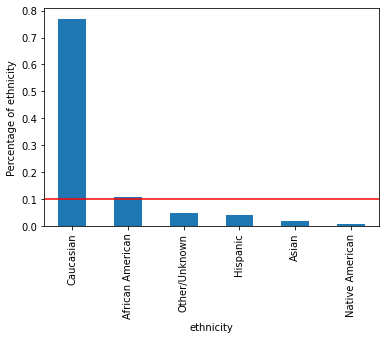

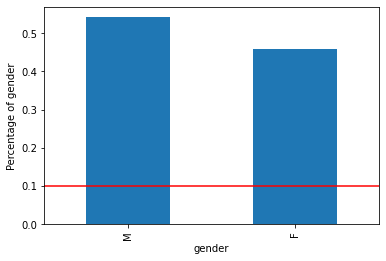

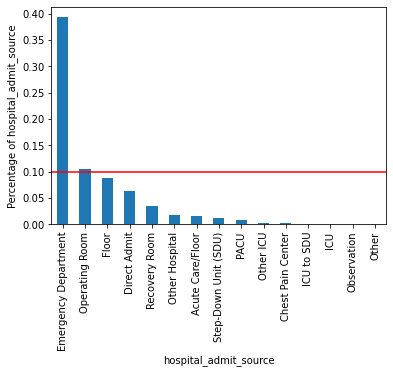

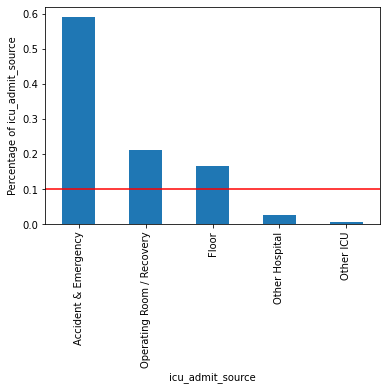

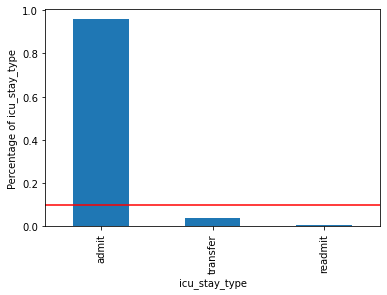

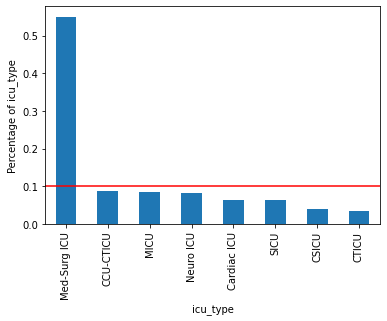

In [23]:
total_labels = len(X_train)

# for each categorical variable
for col in X_train.select_dtypes('object'):

    temp_df = pd.Series(X_train[col].value_counts() / total_labels)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.1, color='red')
    fig.set_ylabel(f'Percentage of {col}')
    plt.show()

For each of the categorical variables, some labels appear in less than 5% of and many appear in less than 5% These are infrequent labels or Rare Values and could cause over-fitting.

In [24]:
X_train.head()

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
43394,50.0,34.113846,1,Caucasian,M,190.5,Operating Room,Operating Room / Recovery,498,admit,Med-Surg ICU,3.586111,0,123.80,2.5,302.0,1208.08,1,0,0.5,42.0,1.30,NaN,3.0,6.0,0.0,4.0,264.0,89.0,27.0,0,64.0,NaN,NaN,NaN,NaN,10.0,135.0,36.2,2172.7008,0,12.81,61.0,54.0,90.0,35.0,90.0,35.0,89.0,67.0,89.0,74.0,86.0,50.0,86.0,50.0,17.0,10.0,100.0,86.0,139.0,118.0,160.0,97.0,160.0,97.0,37.6,36.2,58.0,55.0,90.0,80.0,90.0,80.0,71.0,67.0,83.0,79.0,83.0,79.0,NaN,NaN,16.0,10.0,100.0,100.0,131.0,124.0,160.0,132.0,160.0,132.0,36.4,36.4,2.5,2.5,0.5,0.5,42.0,42.0,8.1,8.1,1.30,1.30,264.0,217.0,NaN,NaN,8.4,8.4,27.0,27.0,NaN,NaN,NaN,NaN,288.0,288.0,5.1,5.1,135.0,135.0,12.81,12.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.0,259.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
56044,22.0,20.147683,0,Caucasian,F,173.0,Direct Admit,Accident & Emergency,601,admit,MICU,0.352778,0,60.30,2.3,113.0,501.06,0,0,5.3,9.0,1.28,1.0,1.0,4.0,0.0,3.0,344.0,128.0,NaN,1,43.0,24.3,24.3,250.0,7.375,35.0,132.0,36.6,NaN,1,NaN,NaN,NaN,68.0,40.0,68.0,40.0,12

In [27]:
# I will replace all the labels that appear in less than 10%
# of the train_df by the label 'rare'


def group_rare_labels(df, var, tresh):

    total_obs = len(df)

    # first I calculate the % of obs for each category
    temp_df = pd.Series(df[var].value_counts() / total_obs)

    # now I create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 5% of obs

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= tresh].index else k)
        for k in temp_df.index
    }

    # now I replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [28]:
X_train['hospital_admit_source'].head()

43394           Operating Room
56044             Direct Admit
102254          Operating Room
31179     Emergency Department
116169                   Floor
Name: hospital_admit_source, dtype: object

In [32]:
# group rare labels in hospital_admit_source

X_train['hospital_admit_source'] = group_rare_labels(X_train, 'hospital_admit_source', 0.1)

X_train['hospital_admit_source']

43394           Operating Room
56044                     rare
102254          Operating Room
31179     Emergency Department
116169                    rare
111121                     NaN
17541                     rare
32428                     rare
103086                     NaN
88594     Emergency Department
35085                      NaN
87659                      NaN
20424           Operating Room
116424                    rare
117185                    rare
108643                    rare
70957                      NaN
75648                      NaN
2483            Operating Room
109377                     NaN
80542                      NaN
82935     Emergency Department
85284     Emergency Department
24854     Emergency Department
98804     Emergency Department
105877          Operating Room
118295    Emergency Department
70689                      NaN
66077                     rare
98739                     rare
90330                      NaN
58479                     rare
2535    

In [34]:
# for each categorical variable
for col in X_train.select_dtypes('object'):
    X_train[col] = group_rare_labels(X_train, col, 0.1)


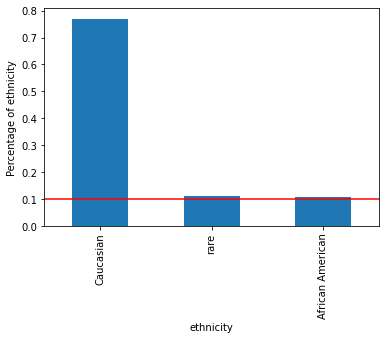

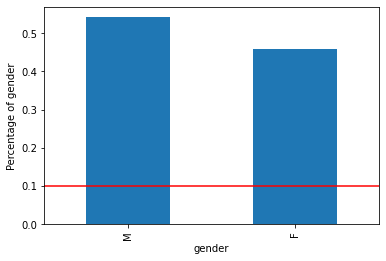

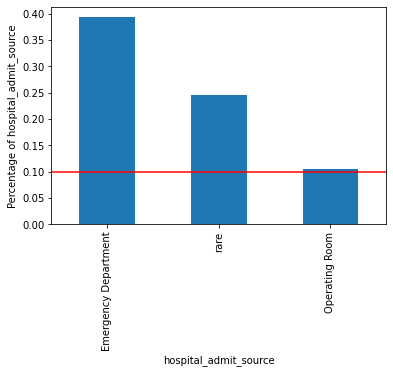

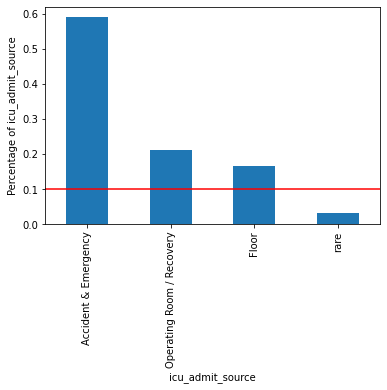

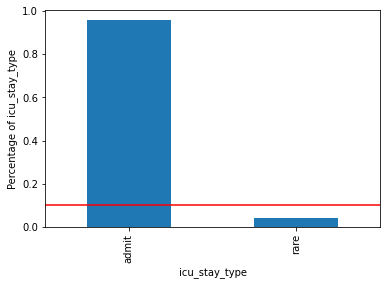

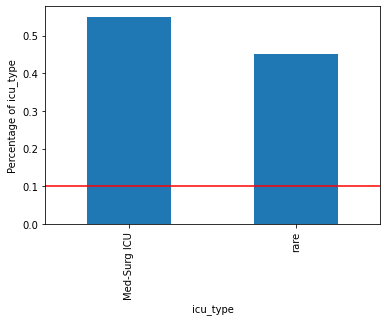

In [35]:
total_labels = len(X_train)

# for each categorical variable
for col in X_train.select_dtypes('object'):

    temp_df = pd.Series(X_train[col].value_counts() / total_labels)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.1, color='red')
    fig.set_ylabel(f'Percentage of {col}')
    plt.show()

--------
<hr>

In [36]:
def missing_zero_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = round(df.isnull().mean().mul(100), 2)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {df.index.name:'col_name', 0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data_type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0 ].sort_values(
        '% of Total Values', ascending=False)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table.reset_index()
missing = missing_zero_values_table(train_df.select_dtypes('object'))
missing.style.background_gradient(cmap='Reds')

Your selected dataframe has 6 columns and 130157 Rows.
There are 4 columns that have missing values.


,index,Missing Values,% of Total Values,Data_type
0,hospital_admit_source,33198,25.510000,object
1,ethnicity,1587,1.220000,object
2,icu_admit_source,240,0.180000,object
3,gender,66,0.050000,object


In [37]:
X_train['hospital_admit_source'].fillna('Missing', inplace=True)
X_test['hospital_admit_source'].fillna('Missing', inplace=True)

In [38]:
def automate_plot(df, variable, target):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in df[variable].unique():
        df[df[variable]==category][target].plot(kind='kde', ax=ax)
    
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].unique()
    ax.legend(lines, labels, loc='best')
    
    plt.show()

In [ ]:
ss = automate_plot(X_train, 'hospital_admit_source', 'diabetes_mellitus')

In [ ]:
# def calc_vif(X):

#     # Calculating VIF
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#     return(vif)

In [ ]:
# # visualize outliers
# !pip install pyod -q
# from pyod.models.abod import ABOD


# Removing high correlated data

In [ ]:
# X.columns

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor    

# def calculate_vif_(X, thresh=5.0):
#     variables = list(range(X.shape[1]))
#     dropped = True
#     while dropped:
#         dropped = False
#         vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
#                for ix in range(X.iloc[:, variables].shape[1])]

#         maxloc = vif.index(max(vif))
#         if max(vif) > thresh:
#             print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
#                   '\' at index: ' + str(maxloc))
#             del variables[maxloc]
#             dropped = True

#     print('Remaining variables:')
#     print(X.columns[variables])
#     return X.iloc[:, variables]